<a href="https://colab.research.google.com/github/moefqy/wireless-modelling-using-path-loss-cost231-hata-model/blob/main/Wireless_Modelling_using_Path_Loss_COST231_HATA_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wireless Modelling using Path Loss COST231 HATA Model for TUGAS14: Pemrograman Python

Name: A. Muh. Mufqi Zuhudi<br/>
NIM: 1101208451<br/>
Class: TTX-44-01 

#Formula of Wireless Modelling
1. Import library
2. Define numeric to db or vice versa
3. Define area type function
4. Define c1 and c2 function
5. Define path loss cost231 hata model formula
6. Define seceiverd power formula
7. Define SNR formula
8. Define capacity formula

In [1]:
#import library
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#NtL = numeric to dB; LtN = dB to numberic
NtL = lambda x: 10*np.log10(x)
LtN = lambda x: 10**(x/10)

In [3]:
#define area type function
def areatype(cm,fc):
  if cm in ["urban","Urban","URBAN"]:
    cmr = 0
    return cmr
  elif cm in ["suburban","Suburban","SUBURBAN"]:
    cmr = (-2) * (np.log10(fc/28))**2 - 5.4
    return cmr
  elif cm in ["open","Open","OPEN"]:
    cmr = (-4.78) * (np.log10(fc))**2 + 18.33*(np.log10(fc))- 40.94
    return cmr

In [4]:
#find c1 and c2 function
def c1c2(fc):
  if fc in range(400,1500):
    c1=69.55
    c2=26.16
    return c1,c2
  elif fc in range(1500,2000):
    c1=46.3
    c2=33.9
    return c1,c2

In [5]:
#path loss model COST231 hata function
def ploss(d,fc,cm,ht,hr):
  cmr = areatype(cm,fc)
  c1,c2 = c1c2(fc)

  ahr = (1.1*np.log10(fc)-0.7)*hr - (1.56*np.log10(fc)-0.8)
  lpdb = c1 + c2*np.log10(fc) - 13.83*np.log10(ht) - ahr + (44.9-(6.55*np.log10(ht)))*np.log10(d) + cmr
  
  return lpdb

In [6]:
#received power (prx) function
def PRX(ptx, lpdb, gtx, grx):
    ptxdb = NtL(ptx)
    prxdb = ptxdb - lpdb + gtx + grx
    prxnum = LtN(prxdb)

    return prxnum

In [7]:
#SNR function
def SNR(prxnum, BW):
    noisedb= -174 + NtL(BW)
    noisenum= LtN(noisedb)

    SNR= prxnum / noisenum

    return SNR

In [8]:
#capacity function
def capacity(SNR,BW):
    cap = BW * np.log2(1+SNR)

    return cap

#Parameters of Wireless Modelling
1. Define paramaters

In [9]:
#N=number of users; dmin=distance min; dmax=distance max; d=random distance; fc=frequency; cm=area type; ht=transmitter height; hr=receiver height; ptx=power transmitter; gtx=gain transmitter; grx=gain receiver
N=200 #point
dmin=300 #m
dmax=1000 #m
d=np.random.randint(dmin,dmax,N)
fc=[700,900,1800] #MHz
cm=["urban","suburban","open"]
ht=80 #m
hr=1.5 #m

ptx= 30000 #miliwatt
gtx=10 #dB
grx=2 #dB
BW= 5000000 #Hz

#Graph of Received Power (Prx) at Frequency 1800 Mhz

In [10]:
pathlossdb_urban=ploss(d,fc[2],cm[0],ht,hr)
pathlossdb_suburban=ploss(d,fc[2],cm[1],ht,hr)
pathlossdb_open=ploss(d,fc[2],cm[2],ht,hr)

In [11]:
PRX_urban=PRX(ptx, pathlossdb_urban, gtx, grx)
PRX_suburban=PRX(ptx, pathlossdb_suburban, gtx, grx)
PRX_open=PRX(ptx, pathlossdb_open, gtx, grx)

In [12]:
d_sort=d[np.argsort(d)]

urban_sort = PRX_urban[np.argsort(d)]
suburban_sort = PRX_suburban[np.argsort(d)]
open_sort = PRX_open[np.argsort(d)]

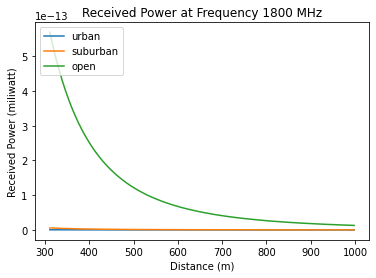

In [13]:
plt.figure()
plt.plot(d_sort,urban_sort)
plt.plot(d_sort,suburban_sort)
plt.plot(d_sort,open_sort)
plt.legend(['urban', 'suburban', 'open'], loc='upper left')
plt.title("Received Power at Frequency 1800 MHz")
plt.xlabel("Distance (m)")
plt.ylabel("Received Power (miliwatt)")
plt.show()

#Graph of Received Power (Prx) at Urban Area

In [14]:
pathlossdb_700=ploss(d,fc[0],cm[0],ht,hr)
pathlossdb_900=ploss(d,fc[1],cm[0],ht,hr)
pathlossdb_1800=ploss(d,fc[2],cm[0],ht,hr)

In [15]:
PRX_700=PRX(ptx, pathlossdb_700, gtx, grx)
PRX_900=PRX(ptx, pathlossdb_900, gtx, grx)
PRX_1800=PRX(ptx, pathlossdb_1800, gtx, grx)

In [16]:
d_sort=d[np.argsort(d)]

fc700_sort = PRX_700[np.argsort(d)]
fc900_sort = PRX_900[np.argsort(d)]
fc1800_sort = PRX_1800[np.argsort(d)]

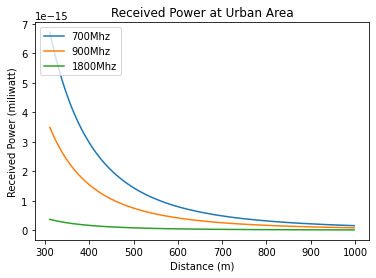

In [17]:
plt.figure()
plt.plot(d_sort,fc700_sort)
plt.plot(d_sort,fc900_sort)
plt.plot(d_sort,fc1800_sort)
plt.legend(['700Mhz','900Mhz','1800Mhz'], loc='upper left')
plt.title("Received Power at Urban Area")
plt.xlabel('Distance (m)')
plt.ylabel('Received Power (miliwatt)')
plt.show()

#Graph of Signal-to-Noise Ratio (SNR) at Frequency 1800 Mhz

In [18]:
SNR_urban= SNR(PRX_urban, BW)
SNR_suburban= SNR(PRX_suburban, BW)
SNR_open= SNR(PRX_open, BW)

In [19]:
d_noise_sort=d[np.argsort(d)]

urban_noise_sort = SNR_urban[np.argsort(d)]
suburban_noise_sort = SNR_suburban[np.argsort(d)]
open_noise_sort = SNR_open[np.argsort(d)]

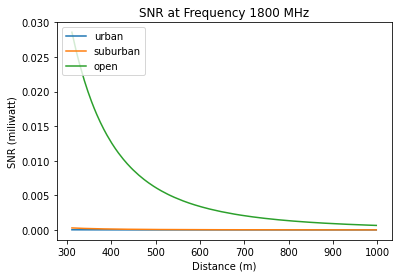

In [20]:
plt.figure()
plt.plot(d_noise_sort,urban_noise_sort)
plt.plot(d_noise_sort,suburban_noise_sort)
plt.plot(d_noise_sort,open_noise_sort)
plt.legend(['urban', 'suburban', 'open'], loc='upper left')
plt.title("SNR at Frequency 1800 MHz")
plt.xlabel("Distance (m)")
plt.ylabel("SNR (miliwatt)")
plt.show()

#Graph of Signal-to-Noise Ratio (SNR) at Urban

In [21]:
SNR_700= SNR(PRX_700, BW)
SNR_900= SNR(PRX_900, BW)
SNR_1800= SNR(PRX_1800, BW)

In [22]:
d_noise_sort=d[np.argsort(d)]

fc700_noise_sort = SNR_700[np.argsort(d)]
fc900_noise_sort = SNR_900[np.argsort(d)]
fc1800_noise_sort = SNR_1800[np.argsort(d)]

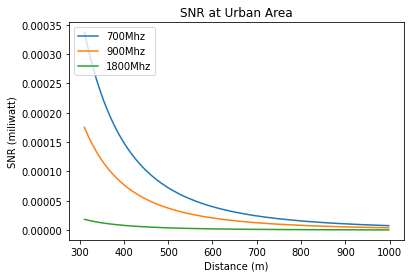

In [23]:
plt.figure()
plt.plot(d_noise_sort,fc700_noise_sort)
plt.plot(d_noise_sort,fc900_noise_sort)
plt.plot(d_noise_sort,fc1800_noise_sort)
plt.legend(['700Mhz','900Mhz','1800Mhz'], loc='upper left')
plt.title("SNR at Urban Area")
plt.xlabel("Distance (m)")
plt.ylabel("SNR (miliwatt)")
plt.show()

#Graph of Capacity at Frequency 1800 Mhz

In [24]:
capacity_urban = capacity(SNR_urban, BW)
capacity_suburban = capacity(SNR_suburban, BW)
capacity_open = capacity(SNR_open, BW)

In [25]:
d_cap_sort=d[np.argsort(d)]

urban_cap_sort = capacity_urban[np.argsort(d)]
suburban_cap_sort = capacity_suburban[np.argsort(d)]
open_cap_sort = capacity_open[np.argsort(d)]

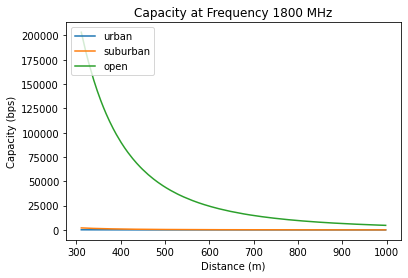

In [26]:
plt.figure()
plt.plot(d_cap_sort,urban_cap_sort)
plt.plot(d_cap_sort,suburban_cap_sort)
plt.plot(d_cap_sort,open_cap_sort)
plt.legend(['urban', 'suburban', 'open'], loc='upper left')
plt.title("Capacity at Frequency 1800 MHz")
plt.xlabel("Distance (m)")
plt.ylabel("Capacity (bps)")
plt.show()

#Graph of Capacity at Frequency Urban Area

In [27]:
capacity_700 = capacity(SNR_700, BW)
capacity_900 = capacity(SNR_900, BW)
capacity_1800 = capacity(SNR_1800, BW)

In [28]:
d_cap_sort=d[np.argsort(d)]

fc700_cap_sort = capacity_700[np.argsort(d)]
fc900_cap_sort = capacity_900[np.argsort(d)]
fc1800_cap_sort = capacity_1800[np.argsort(d)]

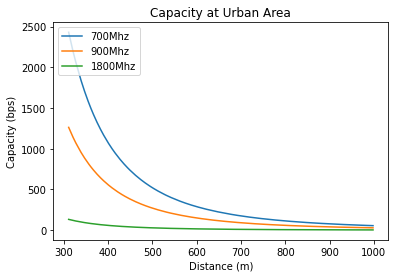

In [29]:
plt.figure()
plt.plot(d_cap_sort,fc700_cap_sort)
plt.plot(d_cap_sort,fc900_cap_sort)
plt.plot(d_cap_sort,fc1800_cap_sort)
plt.legend(['700Mhz','900Mhz','1800Mhz'], loc='upper left')
plt.title("Capacity at Urban Area")
plt.xlabel("Distance (m)")
plt.ylabel("Capacity (bps)")
plt.show()